<a href="https://colab.research.google.com/github/Hiranmai-T/AngularDemo/blob/master/Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Torchaudio for dealing with audio data



In [1]:
pip install --pre torchaudio -f https://download.pytorch.org/whl/nightly/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/torch_nightly.html
     |████████████████████████████████| 7.5MB 1.7MB/s 
     |████████████████████████████████| 559.7MB 28kB/s 
ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 1.7.0.dev20200801+cu92 which is incompatible.
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101


#### Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Importing necessary Libraries

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
from zipfile import ZipFile
import librosa
import torchaudio
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from IPython.display import Audio

#### Extracting source zip file

In [4]:
file_location = '/content/drive/My Drive/MU456_Classifiers_Final_Data.zip'
folder_name = 'MU456_Classifiers_Final_Data'

In [5]:
with ZipFile(file_location, mode='r') as input:
  input.extractall(".") 

#### Creation of dataset text files

In [6]:
from preparedataset import prepareData
from utils import getClasses
#preparing Train data
classes = getClasses()  #The 6 languages in the dataset 
prepareData('./'+folder_name, classes, datatype="train", duration=2, overlap=0.25, file_save="train_d2_o25.txt")
#preparing Test data
prepareData('./'+folder_name, classes, datatype="test", duration=2, overlap=0.25, file_save="test_d2_o25.txt")
print("Dataset was written to the specified files successfully")


Dataset was written to the specified files successfully


#### Preparing Audio Data 

In [7]:
#import dataset
from dataset import AudioData
train = AudioData("./train_d2_o25.txt", sample_rate=8000, n_feats=201, rateof_aug=0.5, aug_strategy=3, time_mask=30, freq_mask=10)
print(len(train))
test = AudioData("./test_d2_o25.txt", sample_rate=8000, n_feats=201, rateof_aug=0.5, aug_strategy=3, time_mask=30, freq_mask=10, valid=True)
print(len(test))

Loaaa..ding data from  ./train_d2_o25.txt
191489
Loaaa..ding data from  ./test_d2_o25.txt
37634


#### Preparing DataLoaders

In [8]:
batch_size = 32
cuda = torch.cuda.is_available()
print(cuda)
if cuda:
  torch.cuda.manual_seed(1)
dataloader_args = dict(shuffle=True, batch_size=batch_size, num_workers=4) if cuda else dict(shuffle=True, batch_size=batch_size)
train_loader = DataLoader(train,  **dataloader_args)
test_loader = DataLoader(test, **dataloader_args)

False


In [9]:
print(train_loader)

In [10]:
spec,label = next(iter(train_loader))

In [11]:
spec.size()

torch.Size([32, 1, 201, 201])

#### Plotting spec

In [12]:
audio_to_plot = 'MU456_Classifiers_Final_Data/Telugu/Telugu_Test/Telugu1.wav'

Sample rate of waveform: 8000


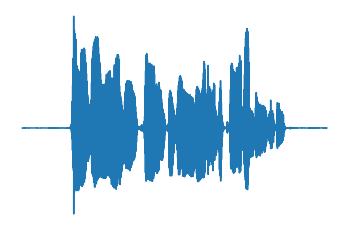

In [13]:
from utils import plot_audio
plot_audio(audio_to_plot)

In [14]:
audio_file = audio_to_plot

In [19]:
wave_form, sample_rate = torchaudio.load('./'+audio_file)
Audio(wave_form, rate=sample_rate)


Shape of spectrogram: torch.Size([1, 128, 154])


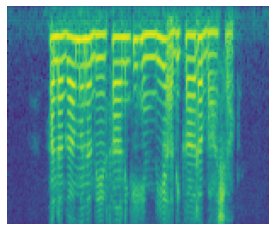

In [20]:
from utils import plot_melspectogram
plot_melspectogram(audio_file)

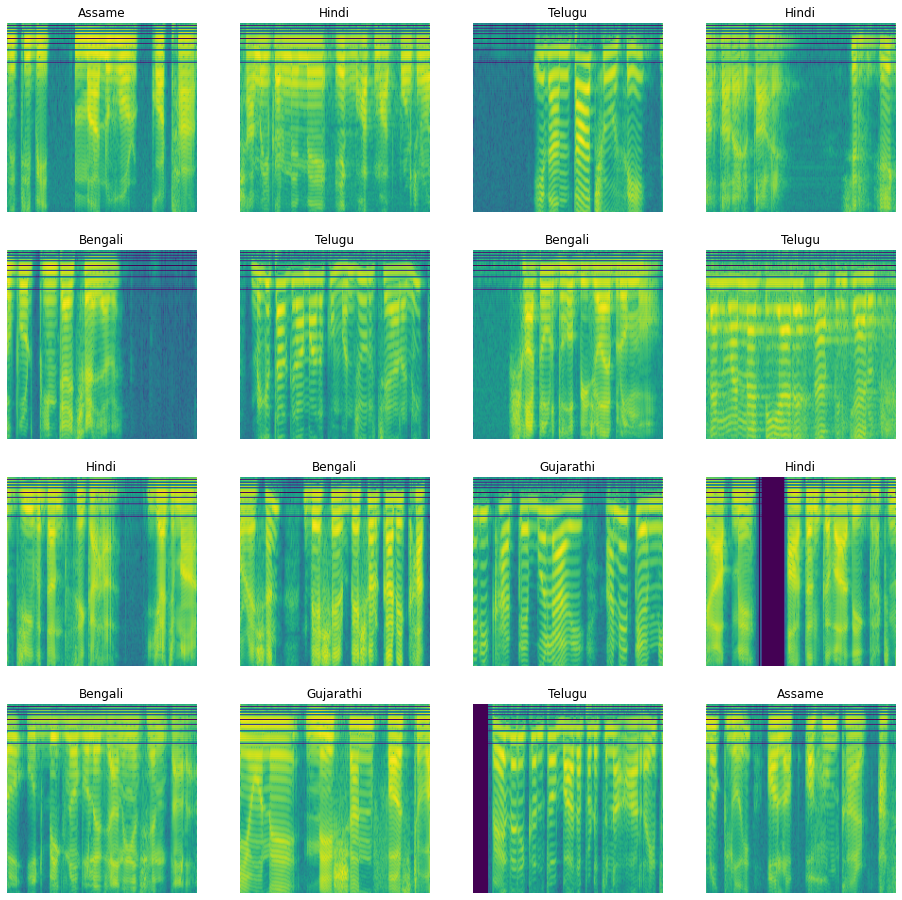

In [21]:
num_of_images = 16
from utils import plot_spec
plot_spec(spec,label,num_of_images)